<a href="https://colab.research.google.com/github/anh-honcharuk/Neural-Networks/blob/main/sem_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

import keras.layers as lay
import keras.models as mod

1. Дан набір точок. Апроксимуйте дану залежність поліномом другого
ступеня за допомогою нейронної мережі. Рішення доповнити графіком з
зображенням вихідних точок і кривої, отриманої за допомогою
нейронної мережі.

In [ ]:
model = mod.Sequential()
model.add(lay.Input(shape=(3,)))
model.add(lay.Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
x_ = range(9)
X_ = [[i * i, i, 1] for i in x_]
Y_ = [6.45, 4.06, 2.53, 2.05, 2.48, 3.97, 6.57, 9.94, 14.45]

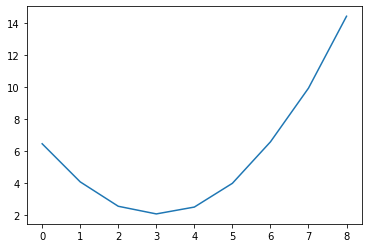

In [ ]:
_, axis = plt.subplots()
axis.plot(x_, Y_)
plt.show()

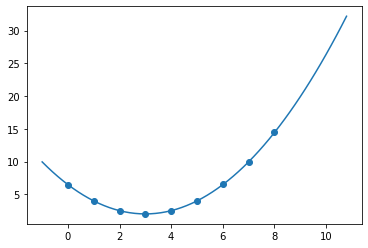

In [ ]:
model.fit(np.array(X_), np.array(Y_), epochs=4500, batch_size=1, verbose=0)
values = np.array([[(i * 0.2 - 1) ** 2, i * 0.2 - 1, 1]  for i in range(60)])
predict_values_y = model.predict(values)
__, axis_ = plt.subplots()
axis_.scatter(x_, Y_)
axis_.plot(values[:,1], predict_values_y)
plt.show()

2. Створіть нейронну мережу, яка правильно класифікує об'єкти,
користуючись даними з таблиці.
Відповідь: Якщо «Параметр 1» = 1, то 1-й клас, якщо «Параметр 2» =
«Параметр 3», то 2-й клас, в іншому випадку - 3-й клас.

In [ ]:
model = mod.Sequential()
model.add(lay.Input(shape=(3,)))
model.add(lay.Dense(units=3, activation='relu'))
model.add(lay.Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X__ = np.array([[1, 1, 0], 
                [1, 0, 1],
                [0, 1, 1],
                [0, 0, 1],
                [0, 1, 0],
                [1, 1, 1],
                [0, 0, 0]])
Y__ = np.array([0, 0, 1, 2, 2, 0, 1])
Y_cat = keras.utils.to_categorical(Y__, 3)
model.fit(X__, Y_cat, epochs=2000, batch_size=1, verbose=0)

In [ ]:
n = range(8)
values = [[i // 4 % 2, i // 2 % 2, i % 2] for i in n]
class_ = np.argmax(model.predict(values), axis=1) + 1
print('1 2 3  class')
print('-------------')
for i in n:
   print(values[i][0], values[i][1], values[i][2], "  ", class_[i])


1 2 3  class
-------------
0 0 0    2
0 0 1    3
0 1 0    3
0 1 1    2
1 0 0    1
1 0 1    1
1 1 0    1
1 1 1    1
